# Importing Libraries

In [244]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



# Loading the Data

In [245]:
df = pd.read_csv('data.csv')
df =df.drop(columns=["NSP"])

In [246]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,9
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,6
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,6
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,6
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,2


# Display basic features of the dataset

In [247]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (2126, 22)


In [248]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000


 We have no null values in any column (2126 count in every column)

# Display the distribution of the target variable

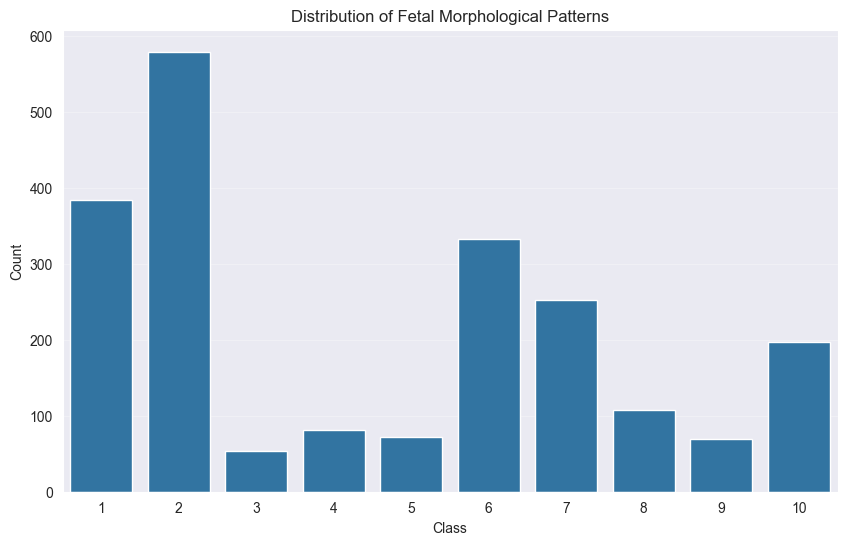

In [249]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CLASS', data=df)
plt.title('Distribution of Fetal Morphological Patterns')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

As depicted, the dataset is imbalanced. Class 2 is the most frequent class, in contrast to class 3,4,5 which appear to be less frequent.

# Take a look at the distribution of the features

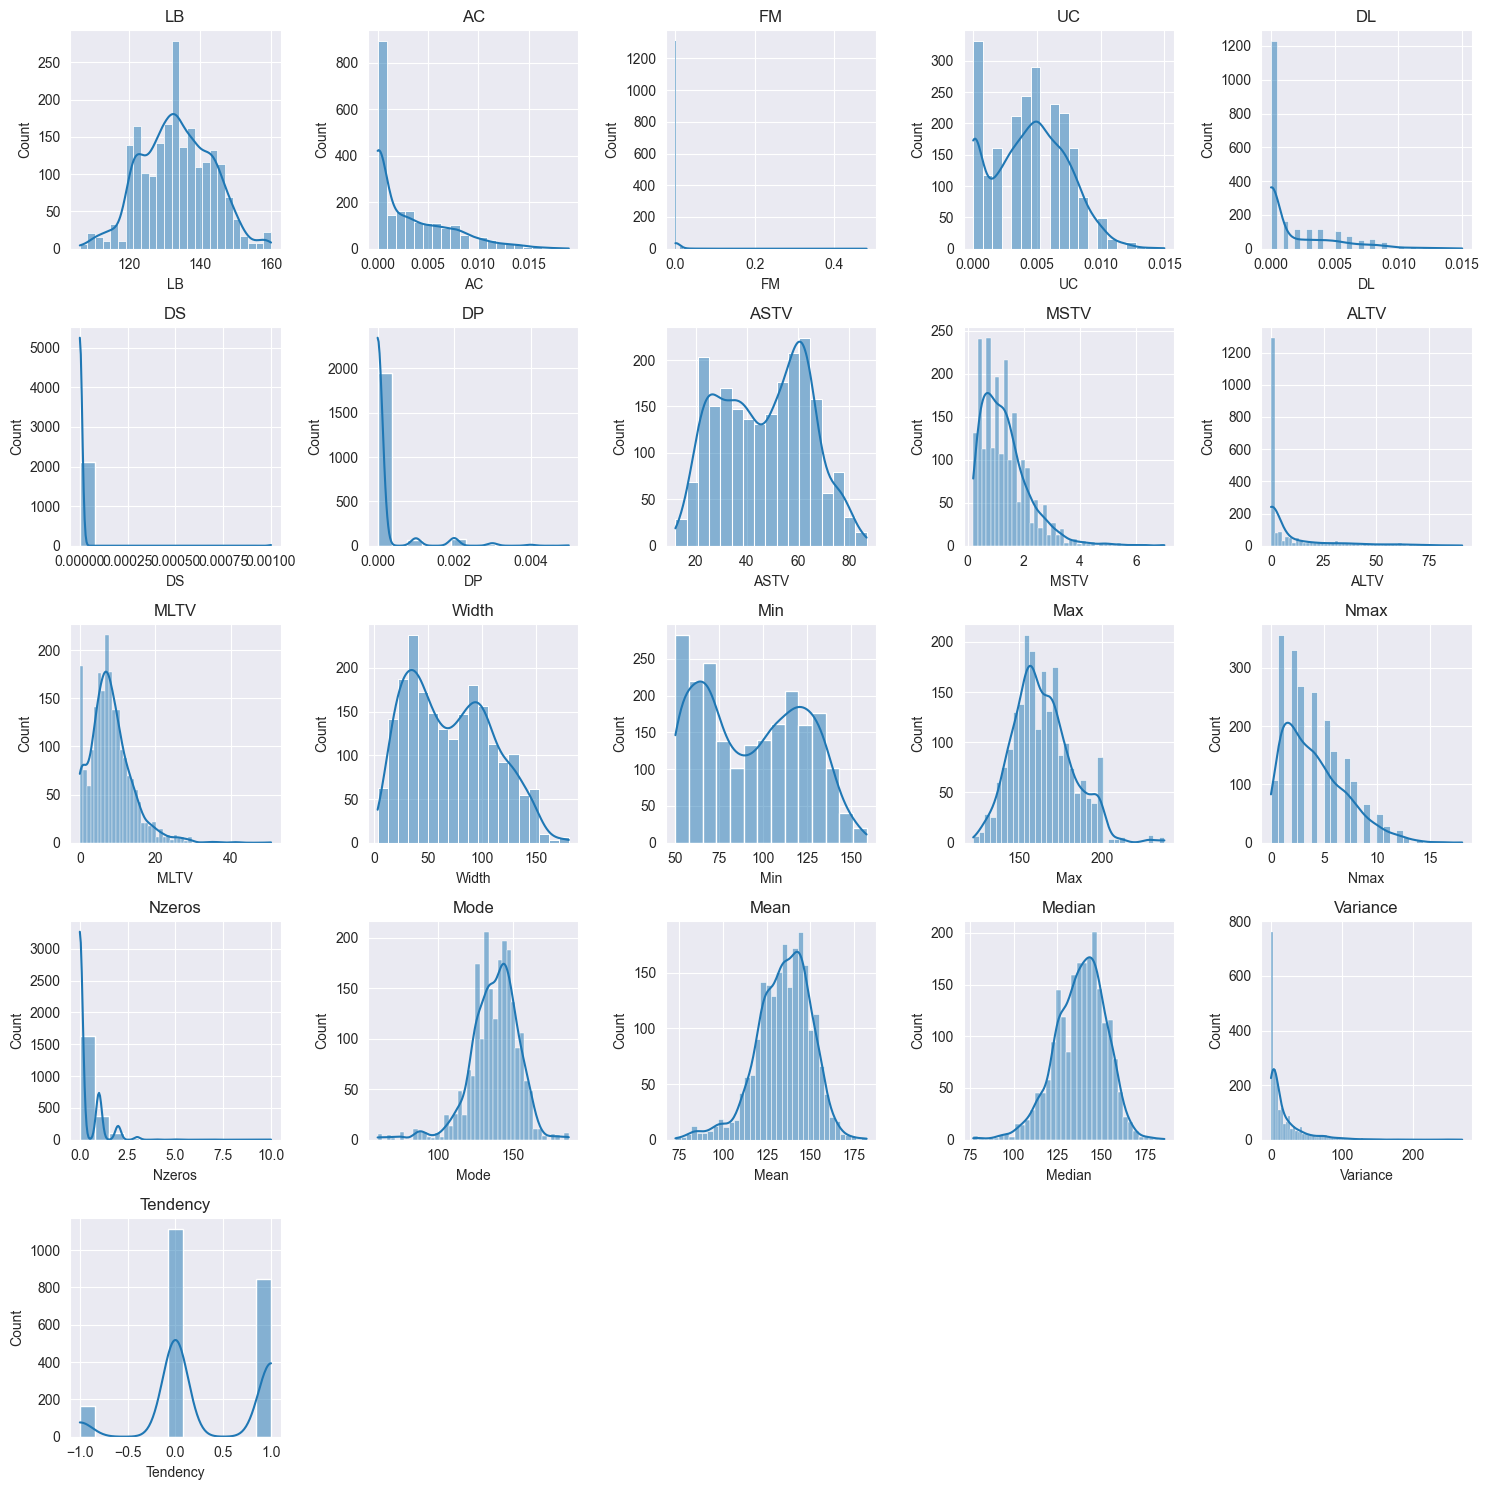

In [250]:

plt.figure(figsize=(15, 15))
for i, column in enumerate(df.columns[:-1], 1):  # Excluding the CLASS column
    plt.subplot(5, 5, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Correlation matrix

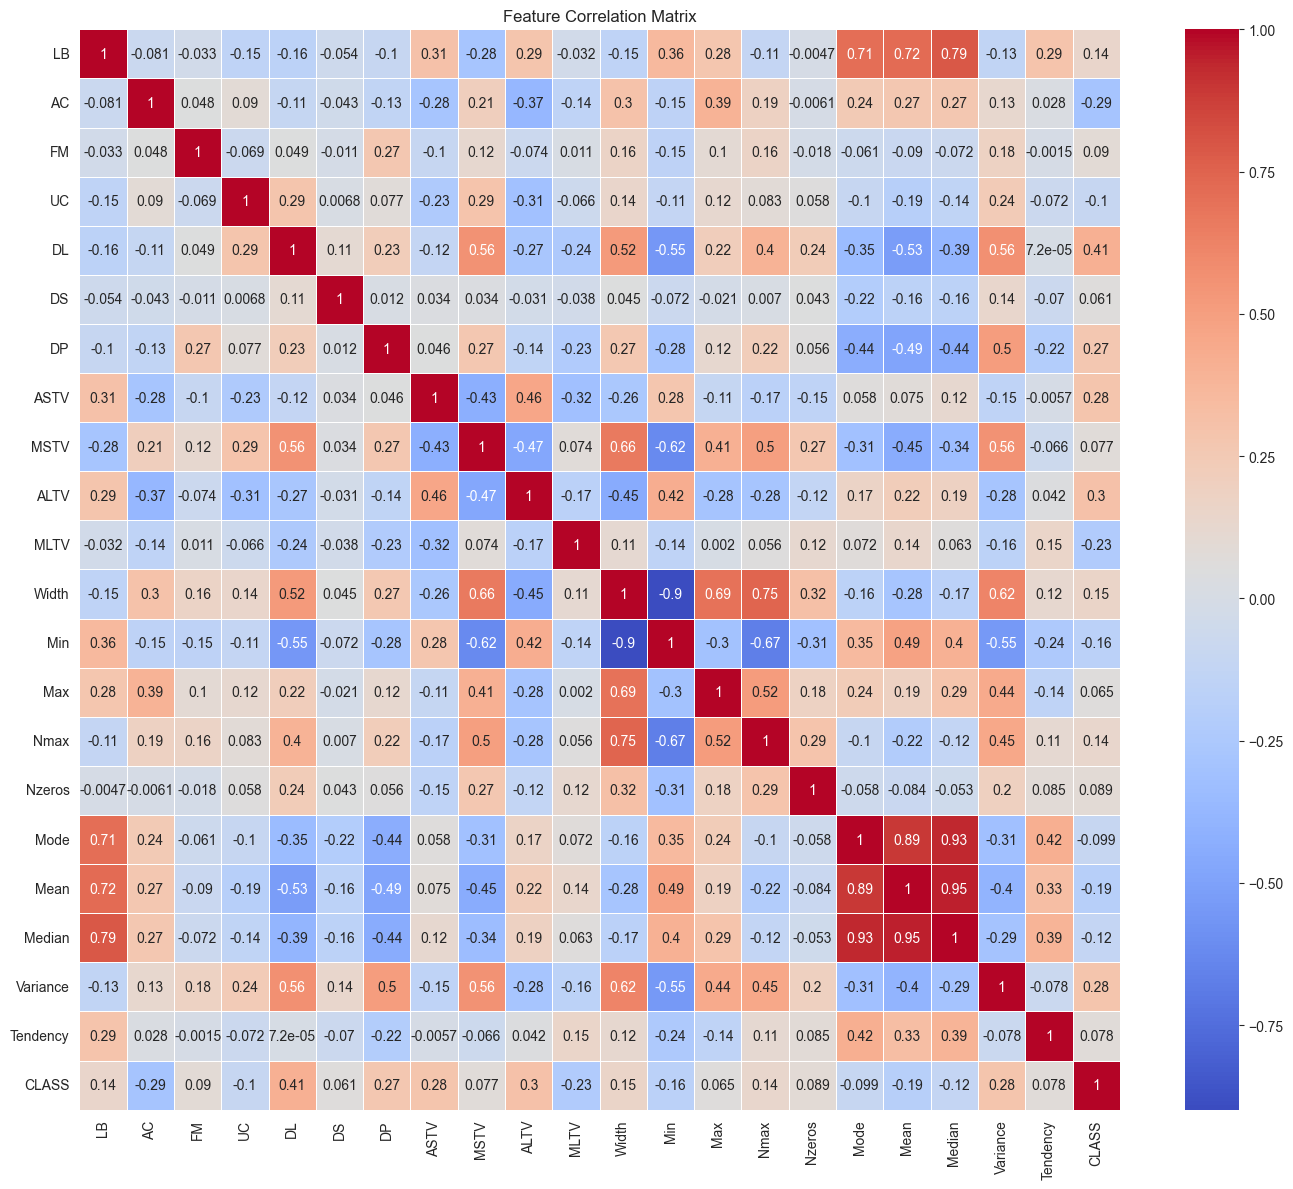

In [251]:

plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
             linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

There is no noticeable correlation between one feature to the target class. The DL feature looks like it has a largest correnation with the target class, at value of 0.41.

Moreover, "Mode", "Mean", "Median" are highly correlated with each other, which can be explained statistically. They all mean similiar things which is why their values can be close to each other.

### 2. Split datasets into training, validation and test set ###

Handling missing values
I chose dropping and median imputation

# Drop

In [252]:
# Drop rows with missing values
df_dropped = df.dropna()


In [253]:
# Split the dataset into features and target variable
X = df_dropped.iloc[:, :-1]
y = df_dropped.iloc[:, -1]

In [254]:
# Splitting train, validation and test  60% - 25% - 15%
X_drop_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_drop_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.375, random_state=42)
# Shapes
print(f"Traning subset shape: {X_drop_train.shape[0]}, {round(X_drop_train.shape[0]/df.shape[0],2)*100}%")
print(f"Validation subset shape: {X_drop_val.shape[0]}, {round(X_drop_val.shape[0]/df.shape[0],2)*100}%")
print(f"Test subset shape: {X_test.shape[0]}, {round(X_test.shape[0]/df.shape[0],2)*100}%")

Traning subset shape: 1275, 60.0%
Validation subset shape: 531, 25.0%
Test subset shape: 320, 15.0%


# Data median inputation

In [255]:
# Median imputation
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

imputer_median = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(
    imputer_median.fit_transform(X),
    columns=X.columns)




In [256]:
# Splitting train, validation and test  60% - 25% - 15%
X_imput_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_imput_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.375, random_state=42)
# Shapes
print(f"Traning subset shape: {X_imput_train.shape[0]}, {round(X_imput_train.shape[0]/df.shape[0],2)*100}%")
print(f"Validation subset shape: {X_imput_val.shape[0]}, {round(X_imput_val.shape[0]/df.shape[0],2)*100}%")
print(f"Test subset shape: {X_test.shape[0]}, {round(X_test.shape[0]/df.shape[0],2)*100}%")

Traning subset shape: 1275, 60.0%
Validation subset shape: 531, 25.0%
Test subset shape: 320, 15.0%


# Data processing methods
I chose standardization and PCA
Standarization will be used on "drop" dataset, and PCA on "imput" dataset

In [257]:
# 1. Standarization (StandardScaler) 

scaler = StandardScaler()
X_train_std = pd.DataFrame(
    scaler.fit_transform(X_drop_train),
    columns=X_drop_train.columns)
X_val_std = pd.DataFrame(
    scaler.transform(X_drop_val),
    columns=X_drop_val.columns)
X_test_std = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns)

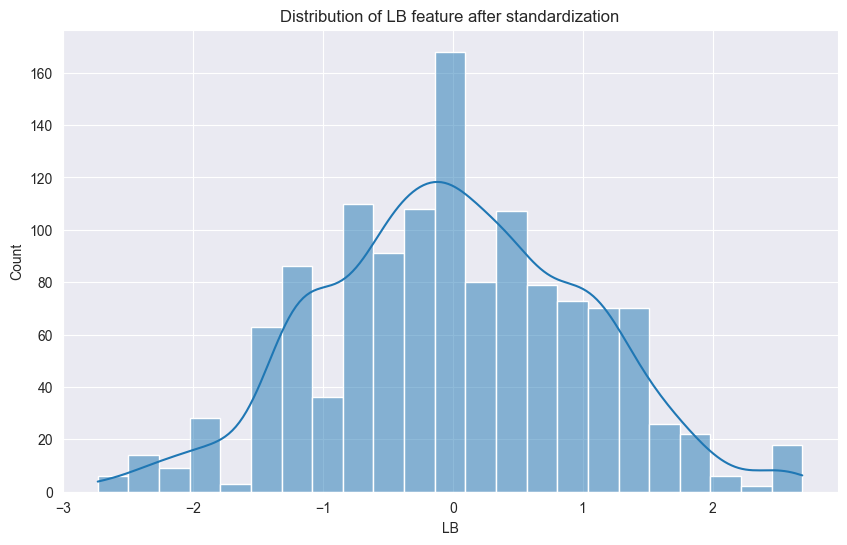

In [258]:
# Quick visualization of the standardized 'LB' feature
plt.figure(figsize=(10, 6))
sns.histplot(X_train_std['LB'], kde=True)
plt.title('Distribution of LB feature after standardization')
plt.show()

In [259]:
# 2. PCA

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_imput_train)
X_val_pca = pca.transform(X_imput_val)
X_test_pca = pca.transform(X_test)

print(f"Number of features after PCA reduction: {X_train_pca.shape[1]}")
print(f"Explained variance ratios: {pca.explained_variance_ratio_}")
print(f"Sum of explained variance: {np.sum(pca.explained_variance_ratio_)}")


Number of features after PCA reduction: 5
Explained variance ratios: [0.59291221 0.16059637 0.095737   0.06747917 0.03714345]
Sum of explained variance: 0.9538681984635607


In [260]:
# It's good to visualize the 2 most import components to see feature dependencies on a plane

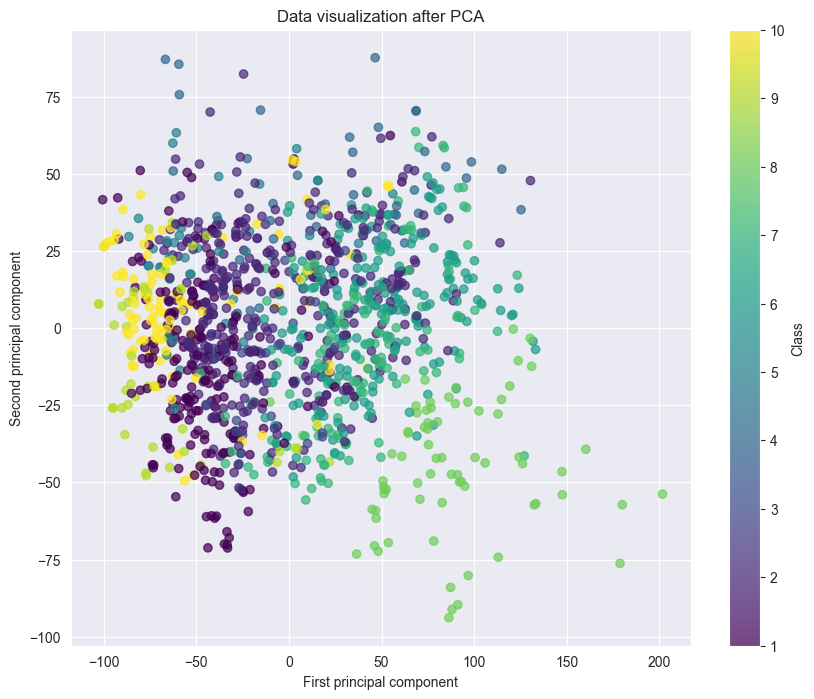

In [261]:
# Visualize data after PCA reduction (first 2 components)
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('Data visualization after PCA')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar(label='Class')
plt.show()

As it shows. The PCA reduced the data to 2 dimensions, and the classes are quite seperated. One visible cluster can be seen in the right bottom corner, which is class 8.

In [262]:
# Lastly, check combo STD and PCA

In [263]:
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_combo = pca.fit_transform(X_train_std)
X_val_combo = pca.transform(X_val_std)
X_test_combo = pca.transform(X_test_std)

print(f"Number of features after PCA reduction: {X_train_combo.shape[1]}")
print(f"Explained variance ratios: {pca.explained_variance_ratio_}")
print(f"Sum of explained variance: {np.sum(pca.explained_variance_ratio_)}")

Number of features after PCA reduction: 14
Explained variance ratios: [0.29549393 0.16378328 0.08636512 0.06729128 0.06035888 0.04820066
 0.04566396 0.04465504 0.0379619  0.02990881 0.02669792 0.02351866
 0.01816914 0.01590799]
Sum of explained variance: 0.9639765720445882


Now let's check the 2 most important components to see feature dependencies on a plane

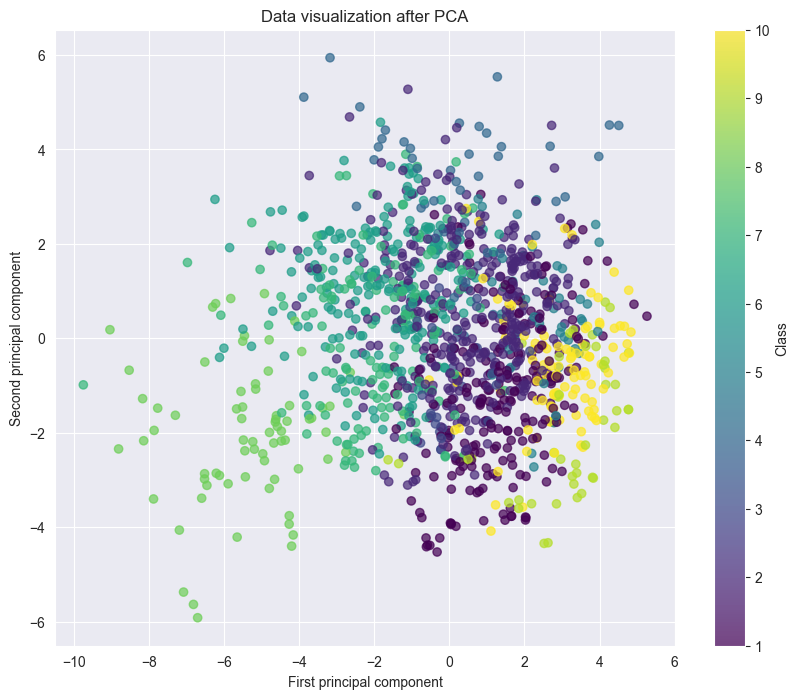

In [264]:
# Visualize data after PCA reduction (first 2 components)
plt.figure(figsize=(10, 8))
plt.scatter(X_train_combo[:, 0], X_train_combo[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('Data visualization after PCA')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar(label='Class')
plt.show()

# 3. Classification

In [301]:
# Let's define some helper functions to evaluate and visualize the model performance

def train_and_evaluate(classifier, X_train, X_val, y_train, y_val, name=None):
    """Train a classifier and evaluate on validation set"""
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = classifier.predict(X_val)
    
    # Calculate validation metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='weighted')
    recall = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Print results if name is provided
    if name:
        print(f"\n--- {name} Validation Results ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
    
    return {
        'classifier': classifier,
        'name': name if name else 'Unknown',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

def final_evaluate(classifier, X_test, y_test, name):
    """Evaluate a trained classifier on test set for final assessment"""
    # Predict on test set
    y_pred = classifier.predict(X_test)
    
    # Calculate test metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n--- {name} Test Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Detailed classification report
    print("\nTest Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Test Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'test_confusion_matrix_{name.replace(" ", "_")}.png')
    plt.close()
    
    return {
        'name': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }

def plot_results(result_dict):
    """Plot comparison of classifier results"""
    
    
    classifier_name = result_dict['name']
    
    # Convert the metrics to a format suitable for plotting
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
        'Value': [
            result_dict['Accuracy'], 
            result_dict['Precision'],
            result_dict['Recall'],
            result_dict['F1']
        ]
    })
    
    plt.figure(figsize=(14, 8))
    
     # Bar plot with metrics on x-axis and values on y-axis
    bars = plt.bar(metrics_df['Metric'], metrics_df['Value'], color='skyblue', width=0.6)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
        
    # Set title and labels
    plt.title(f'Performance Metrics: {classifier_name}', fontsize=14)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0, 1.1)  # Set y-axis from 0 to 1.1 to accommodate the value labels
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Tight layout
    plt.tight_layout()
    plt.show()
    plt.savefig(f'classifier_comparison_{classifier_name.replace(" ", "_")}.png')
    plt.close()
    
    
    
    # Function to plot multiple classifiers for comparison
def plot_multiple_results(results_list, metrics=None,):
    
    if metrics is None:
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    
    # Create dataframe from results list
    df_data = []
    for result in results_list:
        row = {
            'Classifier_name': result['name']
        }
        for metric in metrics:
            row[metric.capitalize()] = result[metric]
        df_data.append(row)
    
    results_df = pd.DataFrame(df_data)
    
    # Create plot
    plt.figure(figsize=(12, 8))
    
    # Plot each metric
    for i, metric in enumerate(metrics, 1):
        metric_cap = metric.capitalize()
        plt.subplot(2, 2, i)
        bars = sns.barplot(x='Classifier_name', y=metric_cap, data=results_df)
        
        # Add value labels on top of bars
        for bar in bars.patches:
            bars.annotate(f'{bar.get_height():.3f}',
                        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01),
                        ha='center', va='bottom', fontsize=8)
        
        plt.title(metric_cap)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    
    
    plt.savefig('classifier_comparison.png')
    
    plt.close()


# 3.1 Naive Bayes
I chose Gaussian Naive Bayes because the features are continuous and normally quite normally distributed

In [266]:
# Store 1 result
nb_results=[]

gnb = GaussianNB()
gnb_result = train_and_evaluate(gnb, X_train_std, X_val_std, y_train, y_val, "Gaussian Naive Bayes")
nb_results.append(gnb_result)





--- Gaussian Naive Bayes Validation Results ---
Accuracy: 0.5217
Precision: 0.6761
Recall: 0.5217
F1 Score: 0.5238


# 3.2 Decision Tree Classifiers

Used for PCA dataset

In [267]:
# Store decision tree results
dt_results = []

# Define the hyperparameter grid
max_depth_values = [i for i in range(1, 100, 2)]
min_samples_split_values = [2, 5, 10]
criterion_values = ['gini', 'entropy']

# Iterate over hyperparameter combinations



best_dt_params = {
    'max_depth': None,
    'min_samples_split': 2, #placeholder
    'criterion': 'gini'
}
best_dt_accuracy = 0 #track max accuracy
best_dt = None

for criterion in criterion_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            dt = DecisionTreeClassifier(
                criterion=criterion,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            
            result = train_and_evaluate(dt, X_train_pca, X_val_pca, y_train, y_val)
            
            print(f"DT (criterion={criterion}, max_depth={max_depth}, min_samples_split={min_samples_split}): "
                  f"Accuracy = {result['accuracy']:.4f}")
            
            if result['accuracy'] > best_dt_accuracy:
                best_dt_accuracy = result['accuracy']
                best_dt_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'criterion': criterion
                }
                best_dt = dt
                
                

DT (criterion=gini, max_depth=1, min_samples_split=2): Accuracy = 0.2919
DT (criterion=gini, max_depth=1, min_samples_split=5): Accuracy = 0.2919
DT (criterion=gini, max_depth=1, min_samples_split=10): Accuracy = 0.2919
DT (criterion=gini, max_depth=3, min_samples_split=2): Accuracy = 0.4237
DT (criterion=gini, max_depth=3, min_samples_split=5): Accuracy = 0.4237
DT (criterion=gini, max_depth=3, min_samples_split=10): Accuracy = 0.4237
DT (criterion=gini, max_depth=5, min_samples_split=2): Accuracy = 0.4972
DT (criterion=gini, max_depth=5, min_samples_split=5): Accuracy = 0.4972
DT (criterion=gini, max_depth=5, min_samples_split=10): Accuracy = 0.4972
DT (criterion=gini, max_depth=7, min_samples_split=2): Accuracy = 0.5217
DT (criterion=gini, max_depth=7, min_samples_split=5): Accuracy = 0.5198
DT (criterion=gini, max_depth=7, min_samples_split=10): Accuracy = 0.5217
DT (criterion=gini, max_depth=9, min_samples_split=2): Accuracy = 0.5386
DT (criterion=gini, max_depth=9, min_samples_sp

C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

DT (criterion=gini, max_depth=19, min_samples_split=5): Accuracy = 0.5443
DT (criterion=gini, max_depth=19, min_samples_split=10): Accuracy = 0.5028
DT (criterion=gini, max_depth=21, min_samples_split=2): Accuracy = 0.5650
DT (criterion=gini, max_depth=21, min_samples_split=5): Accuracy = 0.5443
DT (criterion=gini, max_depth=21, min_samples_split=10): Accuracy = 0.5028
DT (criterion=gini, max_depth=23, min_samples_split=2): Accuracy = 0.5650
DT (criterion=gini, max_depth=23, min_samples_split=5): Accuracy = 0.5443
DT (criterion=gini, max_depth=23, min_samples_split=10): Accuracy = 0.5028
DT (criterion=gini, max_depth=25, min_samples_split=2): Accuracy = 0.5650
DT (criterion=gini, max_depth=25, min_samples_split=5): Accuracy = 0.5443
DT (criterion=gini, max_depth=25, min_samples_split=10): Accuracy = 0.5028
DT (criterion=gini, max_depth=27, min_samples_split=2): Accuracy = 0.5650
DT (criterion=gini, max_depth=27, min_samples_split=5): Accuracy = 0.5443
DT (criterion=gini, max_depth=27, 

C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

DT (criterion=entropy, max_depth=11, min_samples_split=5): Accuracy = 0.5650
DT (criterion=entropy, max_depth=11, min_samples_split=10): Accuracy = 0.5480
DT (criterion=entropy, max_depth=13, min_samples_split=2): Accuracy = 0.5669
DT (criterion=entropy, max_depth=13, min_samples_split=5): Accuracy = 0.5612
DT (criterion=entropy, max_depth=13, min_samples_split=10): Accuracy = 0.5499
DT (criterion=entropy, max_depth=15, min_samples_split=2): Accuracy = 0.5499
DT (criterion=entropy, max_depth=15, min_samples_split=5): Accuracy = 0.5537
DT (criterion=entropy, max_depth=15, min_samples_split=10): Accuracy = 0.5424
DT (criterion=entropy, max_depth=17, min_samples_split=2): Accuracy = 0.5537
DT (criterion=entropy, max_depth=17, min_samples_split=5): Accuracy = 0.5537
DT (criterion=entropy, max_depth=17, min_samples_split=10): Accuracy = 0.5424
DT (criterion=entropy, max_depth=19, min_samples_split=2): Accuracy = 0.5537
DT (criterion=entropy, max_depth=19, min_samples_split=5): Accuracy = 0.

In [268]:
print(f"\nBest Decision Tree parameters: {best_dt_params}")
print(f"Best validation accuracy: {best_dt_accuracy:.4f}")


Best Decision Tree parameters: {'max_depth': 15, 'min_samples_split': 2, 'criterion': 'gini'}
Best validation accuracy: 0.5706


In [269]:
# Create a new model with the best parameters for a clean evaluation
best_dt = DecisionTreeClassifier(
    criterion=best_dt_params['criterion'],
    max_depth=best_dt_params['max_depth'],
    min_samples_split=best_dt_params['min_samples_split'],
    random_state=42
)
best_dt_result = train_and_evaluate(
    best_dt, X_train_pca, X_val_pca, y_train, y_val, 
    f"Decision Tree (Best Parameters)"
)
dt_results.append(best_dt_result)



--- Decision Tree (Best Parameters) Validation Results ---
Accuracy: 0.5706
Precision: 0.5734
Recall: 0.5706
F1 Score: 0.5693


# 3.3 Bonus (Advanced) Classifiers
I used RandomForestClassifier and SVM

I check STD and PCA both.

In [291]:


advanced_results = []


# STD values
n_estimators_values = [i for i in range(1, 100, 2)]
max_depth_values = [None, 10, 20]
best_rf_accuracy = 0
best_rf = None
best_rf_params = {}


for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )
        
        result = train_and_evaluate(rf, X_train_std, X_val_std, y_train, y_val)
        
        print(f"RF (n_estimators={n_estimators}, max_depth={max_depth}): "
              f"Accuracy = {result['accuracy']:.4f}")
        
        if result['accuracy'] > best_rf_accuracy:
            best_rf_accuracy = result['accuracy']
            best_rf_params = {
                'n_estimators': n_estimators,
                'max_depth': max_depth
            }
            best_rf = rf

RF (n_estimators=1, max_depth=None): Accuracy = 0.6761
RF (n_estimators=1, max_depth=10): Accuracy = 0.7024
RF (n_estimators=1, max_depth=20): Accuracy = 0.6761
RF (n_estimators=3, max_depth=None): Accuracy = 0.7288
RF (n_estimators=3, max_depth=10): Accuracy = 0.7363
RF (n_estimators=3, max_depth=20): Accuracy = 0.7288
RF (n_estimators=5, max_depth=None): Accuracy = 0.7815
RF (n_estimators=5, max_depth=10): Accuracy = 0.8041
RF (n_estimators=5, max_depth=20): Accuracy = 0.7815
RF (n_estimators=7, max_depth=None): Accuracy = 0.7891
RF (n_estimators=7, max_depth=10): Accuracy = 0.8117
RF (n_estimators=7, max_depth=20): Accuracy = 0.7891
RF (n_estimators=9, max_depth=None): Accuracy = 0.7910
RF (n_estimators=9, max_depth=10): Accuracy = 0.8211
RF (n_estimators=9, max_depth=20): Accuracy = 0.7910
RF (n_estimators=11, max_depth=None): Accuracy = 0.8230
RF (n_estimators=11, max_depth=10): Accuracy = 0.8173
RF (n_estimators=11, max_depth=20): Accuracy = 0.8230
RF (n_estimators=13, max_depth=

In [292]:
print(f"\nBest Random Forest parameters: {best_rf_params}")
print(f"Best validation accuracy: {best_rf_accuracy:.4f}")


Best Random Forest parameters: {'n_estimators': 31, 'max_depth': None}
Best validation accuracy: 0.8418


In [293]:
best_rf = RandomForestClassifier(
            n_estimators=best_rf_params['n_estimators'],
            max_depth=best_rf_params['max_depth'],
            random_state=42
        )
        

best_rf_result = train_and_evaluate(
    best_rf, X_train_std, X_val_std, y_train, y_val, 
    f"Random Forest (Best Parameters) std"
)
advanced_results.append(best_rf_result)


--- Random Forest (Best Parameters) std Validation Results ---
Accuracy: 0.8418
Precision: 0.8415
Recall: 0.8418
F1 Score: 0.8401


In [294]:
# PCA


n_estimators_values = [i for i in range(1, 100, 2)]
max_depth_values = [None, 10, 20]
best_rf_accuracy_pca = 0
best_rf_pca = None
best_rf_params_pca = {}


for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )
        
        result = train_and_evaluate(rf, X_train_pca, X_val_pca, y_train, y_val)
        
        print(f"RF (n_estimators={n_estimators}, max_depth={max_depth}): "
              f"Accuracy = {result['accuracy']:.4f}")
        
        if result['accuracy'] > best_rf_accuracy_pca:
            best_rf_accuracy_pca = result['accuracy']
            best_rf_params_pca = {
                'n_estimators': n_estimators,
                'max_depth': max_depth
            }
            best_rf_pca = rf
            
print(f"\nBest Random Forest parameters: {best_rf_params_pca}")
print(f"Best validation accuracy: {best_rf_accuracy_pca:.4f}")


best_rf_pca = RandomForestClassifier(
            n_estimators=best_rf_params_pca['n_estimators'],
            max_depth=best_rf_params_pca['max_depth'],
            random_state=42
        )
        

best_rf_result_pca = train_and_evaluate(
    best_rf_pca, X_train_pca, X_val_pca, y_train, y_val, 
    f"Random Forest (Best Parameters) pca"
)
advanced_results.append(best_rf_result_pca)


RF (n_estimators=1, max_depth=None): Accuracy = 0.4821
RF (n_estimators=1, max_depth=10): Accuracy = 0.4878
RF (n_estimators=1, max_depth=20): Accuracy = 0.4821
RF (n_estimators=3, max_depth=None): Accuracy = 0.5631
RF (n_estimators=3, max_depth=10): Accuracy = 0.5556
RF (n_estimators=3, max_depth=20): Accuracy = 0.5631
RF (n_estimators=5, max_depth=None): Accuracy = 0.5687
RF (n_estimators=5, max_depth=10): Accuracy = 0.5763
RF (n_estimators=5, max_depth=20): Accuracy = 0.5687
RF (n_estimators=7, max_depth=None): Accuracy = 0.5932
RF (n_estimators=7, max_depth=10): Accuracy = 0.6008
RF (n_estimators=7, max_depth=20): Accuracy = 0.5932
RF (n_estimators=9, max_depth=None): Accuracy = 0.6121
RF (n_estimators=9, max_depth=10): Accuracy = 0.5989
RF (n_estimators=9, max_depth=20): Accuracy = 0.6121
RF (n_estimators=11, max_depth=None): Accuracy = 0.6121
RF (n_estimators=11, max_depth=10): Accuracy = 0.6139
RF (n_estimators=11, max_depth=20): Accuracy = 0.6121
RF (n_estimators=13, max_depth=

PCA performs visible worse than STD

In [295]:
X_test_pca

array([[-87.43296393,  37.87488466,  21.73305517,  -9.45944424,
         13.49210547],
       [ -5.25366676, -37.29755531, -19.94702146, -19.30267112,
         -8.29508998],
       [ 23.08707076,  17.95307967,  -5.93743276,   2.73474403,
          2.72841832],
       ...,
       [  8.57233828,  20.10584213,  -1.48369112,   7.75602635,
         10.66202082],
       [ 69.74773016,   9.37351193, -36.57713537,   7.10025544,
         14.29601391],
       [-38.38900459,  -0.22731992,  -3.9131827 ,  -9.2719776 ,
          8.37499154]], shape=(320, 5))

Now check it on combo dataset (STD + PCA)

In [296]:
# STD + PCA 


n_estimators_values = [i for i in range(1, 100, 2)]
max_depth_values = [None, 10, 20]
best_rf_accuracy_combo = 0
best_rf_combo = None
best_rf_params_combo = {}


for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )
        
        result = train_and_evaluate(rf, X_train_combo, X_val_combo, y_train, y_val)
        
        print(f"RF (n_estimators={n_estimators}, max_depth={max_depth}): "
              f"Accuracy = {result['accuracy']:.4f}")
        
        if result['accuracy'] > best_rf_accuracy_combo:
            best_rf_accuracy_combo = result['accuracy']
            best_rf_params_combo = {
                'n_estimators': n_estimators,
                'max_depth': max_depth
            }
            best_rf_combo = rf
            
print(f"\nBest Random Forest parameters: {best_rf_params_combo}")
print(f"Best validation accuracy: {best_rf_accuracy_combo:.4f}")


best_rf_combo = RandomForestClassifier(
            n_estimators=best_rf_params_combo['n_estimators'],
            max_depth=best_rf_params_combo['max_depth'],
            random_state=42
        )
        

best_rf_result_combo = train_and_evaluate(
    best_rf_combo, X_train_combo, X_val_combo, y_train, y_val, 
    f"Random Forest (Best Parameters) std+pca"
)
advanced_results.append(best_rf_result_combo)

RF (n_estimators=1, max_depth=None): Accuracy = 0.4953
RF (n_estimators=1, max_depth=10): Accuracy = 0.5009
RF (n_estimators=1, max_depth=20): Accuracy = 0.4953
RF (n_estimators=3, max_depth=None): Accuracy = 0.5763
RF (n_estimators=3, max_depth=10): Accuracy = 0.5970
RF (n_estimators=3, max_depth=20): Accuracy = 0.5763
RF (n_estimators=5, max_depth=None): Accuracy = 0.6309
RF (n_estimators=5, max_depth=10): Accuracy = 0.6648
RF (n_estimators=5, max_depth=20): Accuracy = 0.6309
RF (n_estimators=7, max_depth=None): Accuracy = 0.6648
RF (n_estimators=7, max_depth=10): Accuracy = 0.6704
RF (n_estimators=7, max_depth=20): Accuracy = 0.6648
RF (n_estimators=9, max_depth=None): Accuracy = 0.6723
RF (n_estimators=9, max_depth=10): Accuracy = 0.6836
RF (n_estimators=9, max_depth=20): Accuracy = 0.6704
RF (n_estimators=11, max_depth=None): Accuracy = 0.6893
RF (n_estimators=11, max_depth=10): Accuracy = 0.6911
RF (n_estimators=11, max_depth=20): Accuracy = 0.6949
RF (n_estimators=13, max_depth=

What's interesting, pipeline STD +PCA performs worse than just STD, but better than PCA.

In [276]:
# SVM


In [277]:
dataset_dict ={
    "Std": (X_train_std, X_val_std),
    "PCA": (X_train_pca, X_val_pca)
}

svm_results = []



In [278]:
for name, (X_train,X_val) in dataset_dict.items():
    
    kernel_values = ['linear', 'rbf', 'poly']
    C_values = [0.1, 1.0, 10.0]
    best_svm_accuracy = 0
    best_svm = None
    best_svm_params = {}
    
    for kernel in kernel_values:
        for C in C_values:
            svm = SVC(
                kernel=kernel,
                C=C,
                random_state=42
            )
            
            result = train_and_evaluate(svm, X_train, X_val, y_train, y_val)
            
            print(f"SVM (kernel={kernel}, C={C}): Accuracy = {result['accuracy']:.4f}, dataset: {name}")
            
            if result['accuracy'] > best_svm_accuracy:
                best_svm_accuracy = result['accuracy']
                best_svm_params = {
                    'kernel': kernel,
                    'C': C
                }
                best_svm = svm
                
    
    
    best_svm_result = train_and_evaluate(
    best_svm, X_train, X_val, y_train, y_val, 
    f"SVM (Best Parameters) {name}"
    )
    svm_results.append(best_svm_result)





SVM (kernel=linear, C=0.1): Accuracy = 0.7853, dataset: Std
SVM (kernel=linear, C=1.0): Accuracy = 0.7966, dataset: Std
SVM (kernel=linear, C=10.0): Accuracy = 0.7966, dataset: Std
SVM (kernel=rbf, C=0.1): Accuracy = 0.6554, dataset: Std
SVM (kernel=rbf, C=1.0): Accuracy = 0.7721, dataset: Std


C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM (kernel=rbf, C=10.0): Accuracy = 0.8136, dataset: Std
SVM (kernel=poly, C=0.1): Accuracy = 0.4482, dataset: Std
SVM (kernel=poly, C=1.0): Accuracy = 0.6742, dataset: Std
SVM (kernel=poly, C=10.0): Accuracy = 0.7797, dataset: Std

--- SVM (Best Parameters) Std Validation Results ---
Accuracy: 0.8136
Precision: 0.8156
Recall: 0.8136
F1 Score: 0.8135
SVM (kernel=linear, C=0.1): Accuracy = 0.5838, dataset: PCA


C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM (kernel=linear, C=1.0): Accuracy = 0.5819, dataset: PCA


C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

SVM (kernel=linear, C=10.0): Accuracy = 0.5838, dataset: PCA
SVM (kernel=rbf, C=0.1): Accuracy = 0.4896, dataset: PCA
SVM (kernel=rbf, C=1.0): Accuracy = 0.5932, dataset: PCA
SVM (kernel=rbf, C=10.0): Accuracy = 0.6177, dataset: PCA
SVM (kernel=poly, C=0.1): Accuracy = 0.4482, dataset: PCA
SVM (kernel=poly, C=1.0): Accuracy = 0.5104, dataset: PCA
SVM (kernel=poly, C=10.0): Accuracy = 0.5857, dataset: PCA

--- SVM (Best Parameters) PCA Validation Results ---
Accuracy: 0.6177
Precision: 0.5990
Recall: 0.6177
F1 Score: 0.6032


C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mikolaj\PycharmProjects\Sztuczna\CTG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [279]:
svm_results

[{'classifier': SVC(C=10.0, random_state=42),
  'name': 'SVM (Best Parameters) Std',
  'accuracy': 0.8135593220338984,
  'precision': 0.8155568819273781,
  'recall': 0.8135593220338984,
  'f1': 0.8134920972119384},
 {'classifier': SVC(C=10.0, random_state=42),
  'name': 'SVM (Best Parameters) PCA',
  'accuracy': 0.6177024482109228,
  'precision': 0.5989725905538743,
  'recall': 0.6177024482109228,
  'f1': 0.6032329863397676}]

For both Std and PCA the best kernel is C=10 and kernel=rbf.

Here, in SVM also STD performs better than PCA.

# 3.4 Overfitting prevention

I chose RFC for that, as Tree Classifiers are prone to overfitting

In [280]:
max_depths = list(range(1, 51))

# Arrays to store results
train_scores = []
val_scores = []
test_scores = []
train_val_diffs = []  # Difference between train and validation (overfitting indicator)


In [281]:
# Train and evaluate models with different max_depths
for depth in max_depths:
    # Create and train model
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train_std, y_train)
    
    # Evaluate on training set
    train_pred = rf.predict(X_train_std)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    
    # Evaluate on validation set
    val_pred = rf.predict(X_val_std)
    val_acc = accuracy_score(y_val, val_pred)
    val_scores.append(val_acc)
    
    # Evaluate on test set
    test_pred = rf.predict(X_test_std)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)
    
    # Calculate difference (overfitting measure)
    diff = train_acc - val_acc
    train_val_diffs.append(diff)

In [282]:
results = pd.DataFrame({
    'max_depth': max_depths,
    'train_accuracy': train_scores,
    'validation_accuracy': val_scores,
    'test_accuracy': test_scores,
    'train_val_diff': train_val_diffs
})



In [283]:
# Find best max_depth based on validation accuracy
best_val_idx = results['validation_accuracy'].idxmax()
best_depth = results.loc[best_val_idx, 'max_depth']
best_val_acc = results.loc[best_val_idx, 'validation_accuracy']
best_test_acc = results.loc[best_val_idx, 'test_accuracy']

print(f"\nBest max_depth: {best_depth}")
print(f"Best validation accuracy: {best_val_acc:.4f}")
print(f"Corresponding test accuracy: {best_test_acc:.4f}")


Best max_depth: 11
Best validation accuracy: 0.8475
Corresponding test accuracy: 0.8781


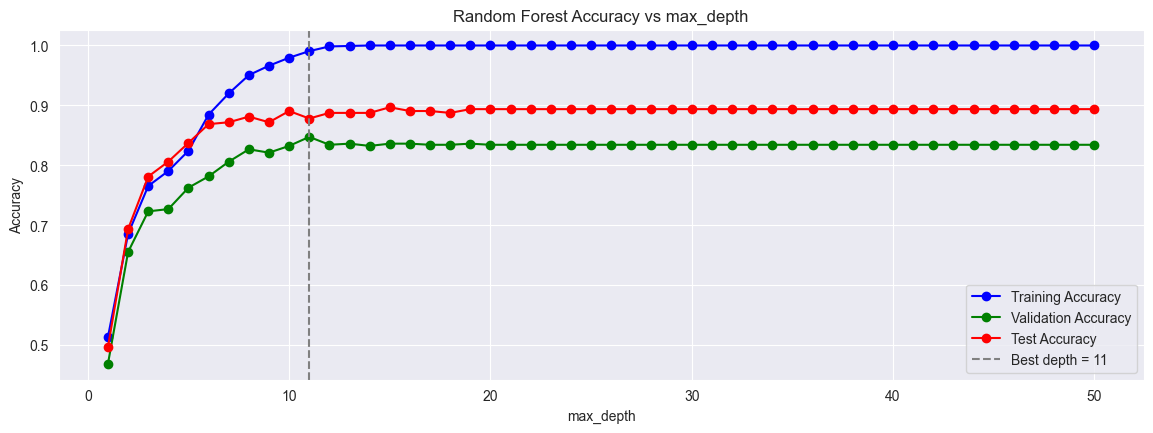

In [284]:
# Visualization

# Plot 1: Accuracy vs max_depth
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(results['max_depth'], results['train_accuracy'], 'o-', color='blue', label='Training Accuracy')
plt.plot(results['max_depth'], results['validation_accuracy'], 'o-', color='green', label='Validation Accuracy')
plt.plot(results['max_depth'], results['test_accuracy'], 'o-', color='red', label='Test Accuracy')
plt.axvline(x=best_depth, color='gray', linestyle='--', label=f'Best depth = {best_depth}')

plt.title('Random Forest Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

 To be honest, i see no overfitting, because accuracy does not drop. However, the largest validation accuracy is gained at depth=11, whatcan be noted

Now check the overfitting on n-estimators.


In [285]:
n_estimators_list = list(range(1, 100,2)) # Let's say 100 trees is the max

# Arrays to store results
train_scores = []
val_scores = []
test_scores = []
train_val_diffs = []  # Difference between train and validation (overfitting indicator)

In [286]:
# Train and evaluate models with different max_depths
for n_estimators in n_estimators_list:
    # Create and train model
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_std, y_train)
    
    # Evaluate on training set
    train_pred = rf.predict(X_train_std)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    
    # Evaluate on validation set
    val_pred = rf.predict(X_val_std)
    val_acc = accuracy_score(y_val, val_pred)
    val_scores.append(val_acc)
    
    # Evaluate on test set
    test_pred = rf.predict(X_test_std)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)
    
    # Calculate difference (overfitting measure)
    diff = train_acc - val_acc
    train_val_diffs.append(diff)
    
results = pd.DataFrame({
    'n_estimators': n_estimators_list,
    'train_accuracy': train_scores,
    'validation_accuracy': val_scores,
    'test_accuracy': test_scores,
    'train_val_diff': train_val_diffs
})





In [287]:
# Find best n_estimators based on validation accuracy
best_val_idx = results['validation_accuracy'].idxmax()
best_n_estimators = results.loc[best_val_idx, 'n_estimators']
best_val_acc = results.loc[best_val_idx, 'validation_accuracy']
best_test_acc = results.loc[best_val_idx, 'test_accuracy']

print(f"\nBest n_estimators: {best_n_estimators}")
print(f"Best validation accuracy: {best_val_acc:.4f}")
print(f"Corresponding test accuracy: {best_test_acc:.4f}")


Best n_estimators: 31
Best validation accuracy: 0.8418
Corresponding test accuracy: 0.8969


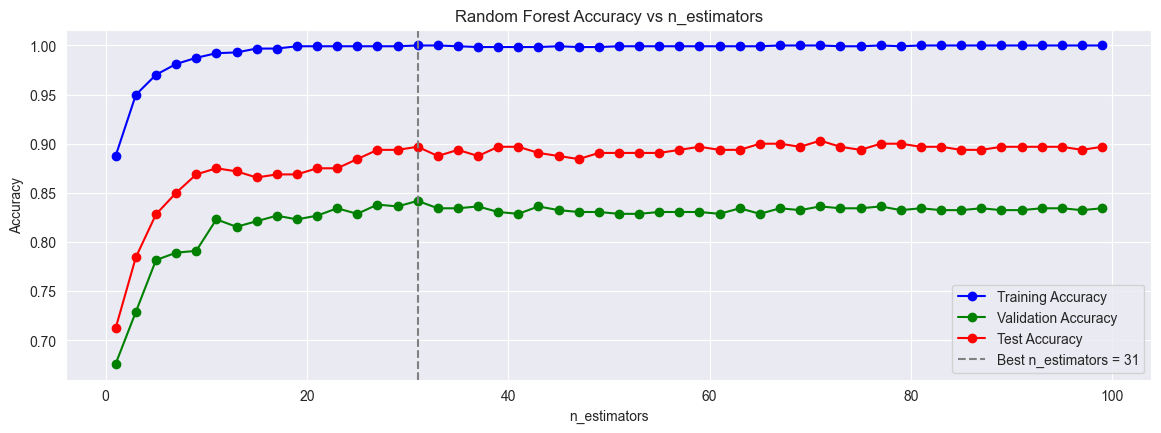

In [288]:
# Visualization

# Plot 1: Accuracy vs max_depth
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(results['n_estimators'], results['train_accuracy'], 'o-', color='blue', label='Training Accuracy')
plt.plot(results['n_estimators'], results['validation_accuracy'], 'o-', color='green', label='Validation Accuracy')
plt.plot(results['n_estimators'], results['test_accuracy'], 'o-', color='red', label='Test Accuracy')
plt.axvline(x=best_n_estimators, color='gray', linestyle='--', label=f'Best n_estimators = {best_n_estimators}')

plt.title('Random Forest Accuracy vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

Here we still see no overfitting, best estimators at 391. However, looking at the graph, we can assume that n_estimators=31 is the best choice.

# 4. Classification Oversight

In [289]:
# Let's take a look at models' performance 

print(f"Naive Bayes results: {nb_results}\n")
print(f"Decision Tree results: {dt_results}\n")
print(f"Random Forest results: {advanced_results}\n")
print(f"SVM results: {svm_results}\n")

Naive Bayes results: [{'classifier': GaussianNB(), 'name': 'Gaussian Naive Bayes', 'accuracy': 0.5216572504708098, 'precision': 0.6760707104669145, 'recall': 0.5216572504708098, 'f1': 0.5237692203460443}]

Decision Tree results: [{'classifier': DecisionTreeClassifier(max_depth=15, random_state=42), 'name': 'Decision Tree (Best Parameters)', 'accuracy': 0.5706214689265536, 'precision': 0.5734033573931817, 'recall': 0.5706214689265536, 'f1': 0.5693474733570941}]

Random Forest results: [{'classifier': RandomForestClassifier(n_estimators=31, random_state=42), 'name': 'Random Forest (Best Parameters) std', 'accuracy': 0.8418079096045198, 'precision': 0.8415385711377873, 'recall': 0.8418079096045198, 'f1': 0.8401332975145329}, {'classifier': RandomForestClassifier(n_estimators=31, random_state=42), 'name': 'Random Forest (Best Parameters) pca', 'accuracy': 0.632768361581921, 'precision': 0.6268314789987357, 'recall': 0.632768361581921, 'f1': 0.6254590292525877}, {'classifier': RandomForestC

Final results on test set

In [297]:
nb_result_final = final_evaluate(nb_results[0]['classifier'], X_test_std, y_test, "Naive Bayes")
dt_result_final = final_evaluate(dt_results[0]['classifier'], X_test_pca, y_test, "Decision Tree")
rf_result_final_std = final_evaluate(advanced_results[0]['classifier'], X_test_std, y_test, "Random Forest std")
rf_result_final_pca = final_evaluate(advanced_results[1]['classifier'], X_test_pca, y_test, "Random Forest pca")
rf_result_final_combo = final_evaluate(advanced_results[2]['classifier'], X_test_combo, y_test, "Random Forest combo")
svm_result_final_std = final_evaluate(svm_results[0]['classifier'], X_test_std, y_test, "SVM std")
svm_result_final_pca = final_evaluate(svm_results[1]['classifier'], X_test_pca, y_test, "SVM pca")


--- Naive Bayes Test Results ---
Accuracy: 0.5031
Precision: 0.6555
Recall: 0.5031
F1 Score: 0.5179

Test Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.33      0.44        63
           2       0.75      0.56      0.64        86
           3       0.26      0.62      0.37         8
           4       0.24      1.00      0.38        12
           5       0.19      0.50      0.28         8
           6       1.00      0.33      0.50        45
           7       0.78      0.89      0.83        44
           8       0.67      0.86      0.75         7
           9       0.14      0.86      0.24         7
          10       0.31      0.12      0.18        40

    accuracy                           0.50       320
   macro avg       0.50      0.61      0.46       320
weighted avg       0.66      0.50      0.52       320


--- Decision Tree Test Results ---
Accuracy: 0.6031
Precision: 0.6135
Recall: 0.6031
F1 Score: 0.6006

Test Cl

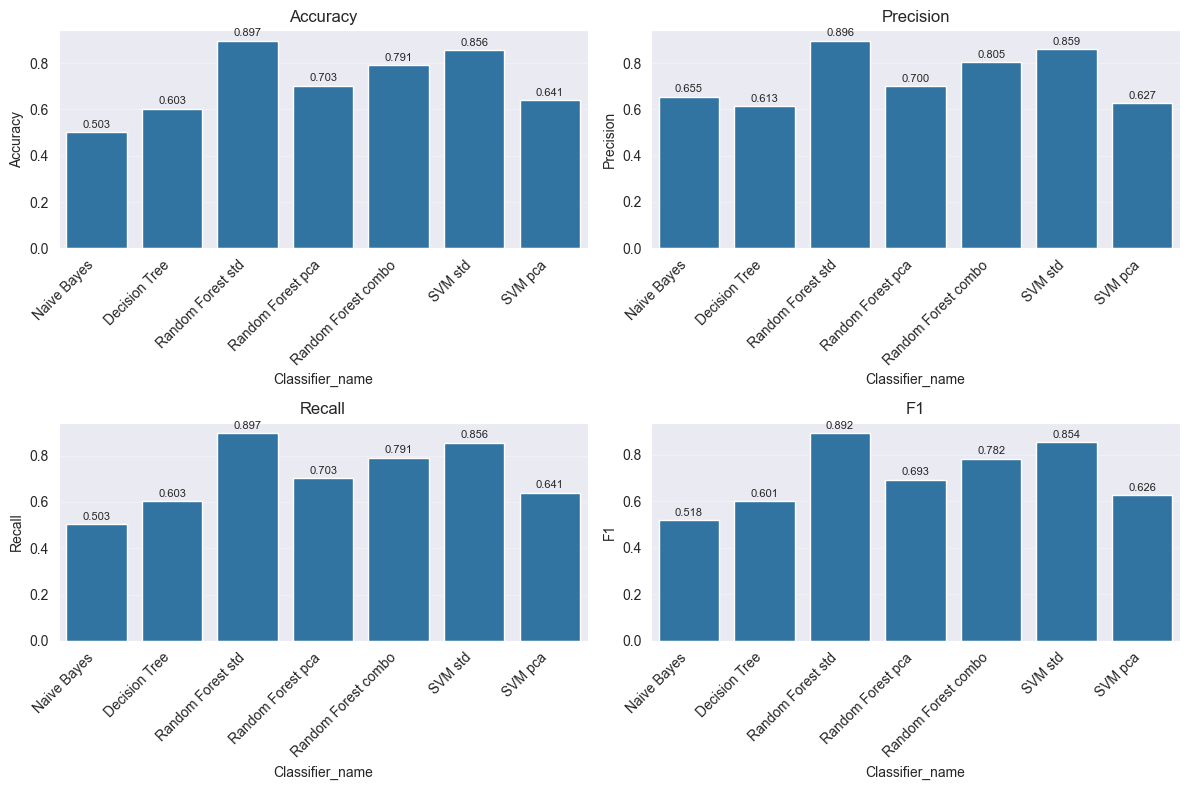

In [302]:
results_list = [nb_result_final, dt_result_final, rf_result_final_std, rf_result_final_pca, rf_result_final_combo, svm_result_final_std, svm_result_final_pca]

plot_multiple_results(results_list)

In [ ]:
nb_result_final